# SEN4018 - Data Science with Python

Muhammet Tarık Can - 1728932 \
Abdullah Samet Baran - 1729676

## PART I - Project Summary



This dataset provides the top popular anime by season. It includes the determined animes' qualifications based on their popularity. Characteristics of the published series have been categorized in several variations which is consisting some missing as well.
The aim of this study is uncovering the functional data, notify conclusions and reinforce decision-making strategies in order to strengthen accountability. 
Our major finding on there is that when we analyzed our data, it has not a small number of neglectable outliers and noise. As a result of this outcome, we decided to use Density-Based Clustering strategy. 
Link of the dataset : https://www.kaggle.com/angadchau/anime-dataset?select=anime.csv

## PART II - Dataset Description



Investigation of the dataset demonstrates to us that this dataset provides the top popular anime by season. It includes the determined animes' qualifications based on their popularity. Characteristics of the published series have been categorized in several variations which consist of some missing as well. Moreover, The sample amount is 2000 and this database includes 11 attributes. Lastly, the attribute types are “Name of the anime”, “Rating”, “Ranking”,” Followers”, “Type”, “Episodes”, “License”, “Study”, “Genre”, “Demographics” and “Age”.

Types of each attributes take place in the next part.

## PART II(cont.) - Basic Descriptive Statistics

### Import statements

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

### Accessing the data

In [ ]:
df = pd.read_csv('anime.csv')
df.head()

,Name of the anime,Rating,Ranking,Followers,Type,Episodes,License,Study,Genre,Demographics,Age
0,Death Note,8.63,1,"3,150,451",TV,37,VIZ Media,Madhouse,"Mystery,Supernatural,Suspense",Shounen,R - 17+ (violence & profanity)
1,Shingeki no Kyojin,8.52,2,"3,136,959",TV,25,Funimation,Wit Studio,"Action,Drama,Fantasy,Mystery",Shounen,R - 17+ (violence & profanity)
2,Fullmetal Alchemist: Brotherhood,9.16,3,"2,674,846",TV,64,"Funimation,Aniplex of America",Bones,"Action,Adventure,Comedy,Drama,Fantasy",Shounen,R - 17+ (violence & profanity)
3,Sword Art Online,7.21,4,"2,583,874",TV,25,Aniplex of America,A-1 Pictures,"Action,Adventure,Fantasy,Romance",NaN,PG-13 - Teens 13 or older
4,One Punch Man,8.52,5,"2,577,610",TV,12,VIZ Media,Madhouse,"Action,Comedy,Sci-Fi,Supernatural",NaN,R - 17+ (violence & profanity)


### Some statistics

#### Attributes

In [ ]:
df.dtypes

Name of the anime     object
Rating               float64
Ranking                int64
Followers             object
Type                  object
Episodes              object
License               object
Study                 object
Genre                 object
Demographics          object
Age                   object
dtype: object

Ranking feature is just numbers from 1 to 2000 so we do not need to find any outliers or other statistical information.

Episodes and Followers features are shown as object but in fact, their type is numerical. We will handle this on preprocessing part.

In [ ]:
dfRating = df.dropna(subset=['Rating'])

The dataframe without NaN data on 'Rating' column. 

In [ ]:
dfRating.describe()['Rating']

count    1979.000000
mean        7.462567
std         0.677055
min         3.340000
25%         7.090000
50%         7.470000
75%         7.925000
max         9.160000
Name: Rating, dtype: float64

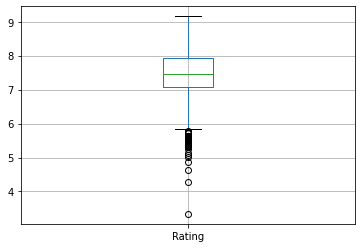

In [ ]:
dfRating.boxplot(column=['Rating']);

In [ ]:
quarter1 = dfRating.describe().Rating['25%']
quarter2 = dfRating.describe().Rating['50%']
quarter3 = dfRating.describe().Rating['75%']
meanRating = dfRating.describe().Rating['mean']
IQR = quarter3 - quarter1
lowerBound = quarter1 - (1.5 * IQR)
upperBound = quarter3 + (1.5 * IQR)
medianRating = dfRating.Rating.median()
rangeRating = dfRating.describe().Rating['max'] - dfRating.describe().Rating['min']

In [ ]:
print(f"Mean of the Rating column is {meanRating:f}" + 
      f"\nLower bound of the box plot is {lowerBound}" +
      f"\nUpper bound of the box plot is {upperBound}" +  
      f"\nMedian of the Rating column is {medianRating}" + 
      f"\nRange of the Rating column is {rangeRating}")

Mean of the Rating column is 7.462567
Lower bound of the box plot is 5.8375
Upper bound of the box plot is 9.1775
Median of the Rating column is 7.47
Range of the Rating column is 5.82


In [ ]:
upperOutliersRating = dfRating.loc[(dfRating['Rating'] > upperBound), ['Name of the anime','Rating']]
lowerOutliersRating = dfRating.loc[(dfRating['Rating'] < lowerBound), ['Name of the anime','Rating']]
ratingOutliers = pd.concat([lowerOutliersRating,upperOutliersRating])
ratingOutliers

,Name of the anime,Rating
170,Yakusoku no Neverland 2nd Season,5.45
251,School Days,5.59
583,Diabolik Lovers,5.24
726,Taboo Tattoo,5.76
745,Isekai Cheat Magician,5.41
805,Tsuujou Kougeki ga Zentai Kougeki de Ni-kai Ko...,5.55
888,Ousama Game The Animation,5.01
899,Mayoiga,5.51
907,Big Order (TV),5.38
1059,Pupa,3.34


This table contains the outliers. 

#### Null objects

In [ ]:
percentage = df.shape[0] / 100
percentage
df.isnull().sum()/percentage

Name of the anime     0.00
Rating                1.05
Ranking               0.00
Followers             0.00
Type                  0.00
Episodes              0.00
License               0.00
Study                 0.00
Genre                 8.40
Demographics         55.80
Age                   0.00
dtype: float64

We will use 'Other' tag for null 'Demographics' column data. 
For 'Rating' column we ignored null observations above. Null values mean that series is not started yet or they are just corrupted data.

In [ ]:
unknownEpisodes = df.loc[df['Episodes'] == 'Unknown'].count()['Episodes']
print("Unknown episode count is " + str(unknownEpisodes))

Unknown episode count is 25


There are 25 'Unknown' values used for series that have not yet started or ended. For the 'Episodes' column, we may ignore these data or replace the 'unknown' value with the mean of the column according to the situation.

In [ ]:
df.loc[df['Type'] == 'Unknown', ['Name of the anime','Type']]

,Name of the anime,Type
1925,Bleach: Sennen Kessen-hen,Unknown


Since it is only 1 observation we will manually fill the 'Unknown' data with 'TV'.

In [ ]:
df.loc[df['Genre'].isnull() , ['Name of the anime', 'Genre', 'Rating']]

,Name of the anime,Genre,Rating
22,Koe no Katachi,NaN,8.97
60,Charlotte,NaN,7.75
125,Kimetsu no Yaiba Movie: Mugen Ressha-hen,NaN,8.71
140,Black Lagoon,NaN,8.03
154,Youkoso Jitsuryoku Shijou Shugi no Kyoushitsu ...,NaN,7.84
...,...,...,...
1962,Bishounen Tanteidan,NaN,7.21
1975,Show By Rock!!,NaN,7.03
1984,BanG Dream!,NaN,6.97
1989,"Haikyuu!!: vs. ""Akaten""",NaN,7.77


There are 168 observations that has no Genre data. We cannot predict the genres so we will replace them with 'NA' (Not Available). 

#### Attribute counts

Names of the animes are all unique as expected.
Rating and Ranking features are numerical data.
Episodes and Followers data is nominal but should be numerical we will handle this on preprocessing part.

In [ ]:
df.Type.value_counts()

TV         1462
Movie       267
OVA         130
Special      90
ONA          49
Music         1
Unknown       1
Name: Type, dtype: int64

In [ ]:
df.Study.value_counts()

J.C.Staff                                           105
A-1 Pictures                                         96
Madhouse                                             91
Toei Animation                                       65
Studio Deen                                          65
                                                   ... 
Kinema Citrus,       DR Movie                         1
Barnum Studio,       SILVER LINK.,       Connect      1
SANZIGEN                                              1
Ordet,       LIDENFILMS                               1
Wolfsbane                                             1
Name: Study, Length: 279, dtype: int64

There are multiple studies in one column seperated by comma. 3 columns are like that. We are going to handle this on preprocessing part.

In [ ]:
df.Demographics.value_counts()

Shounen    510
Seinen     218
Shoujo     104
Josei       27
Kids        25
Name: Demographics, dtype: int64

In [ ]:
df.Age.value_counts()

PG-13 - Teens 13 or older         1288
R - 17+ (violence & profanity)     455
R+ - Mild Nudity                   180
PG - Children                       39
G - All Ages                        31
None                                 6
Rx - Hentai                          1
Name: Age, dtype: int64

None indicates there is no such an age gap data. We will leave it like that.

#### Some visualizations

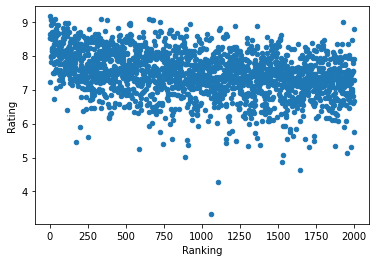

In [ ]:
df.plot("Ranking","Rating",kind = 'scatter');

As it is seen, the rating score slightly decreases as the popularity decreases and there are some outliers.

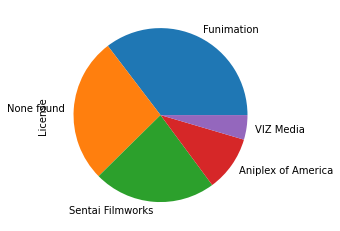

In [ ]:
df.License.value_counts().head().plot.pie();

License distribution is shown.

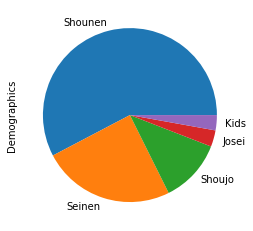

In [ ]:
df.Demographics.value_counts().plot.pie();

Demography distribution is shown.

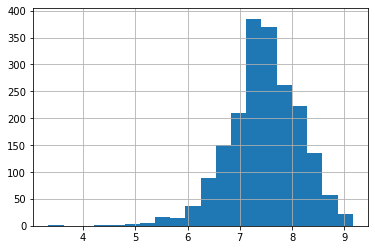

In [ ]:
dfRating['Rating'].hist(bins=20);

Rating distribution is shown.

All of the visualizations are just examples. Shown data is not preprocessed yet. More tidied up and correct data will be shown at Part IV with detailed visualizations.

## PART III - Data Preprocessing

We are going to modify following features:

- Followers
- Type
- Episodes
- License
- Study
- Genre
- Demographics
- Age

We will not modify **Name of the anime** column because this column only contains unique series names and it does not need further modifications.

We will not modify **Rating** column because we already modified it above.

We will not modify **Ranking** column because there is no missing data and inconsistency issues.

We are going to modify **Followers** column because its type is shown in 'object' data type. We need to convert it to the numerical data type.

We are going to modify **Type** column because it contains missing values.

We are going to modify **Episodes** column with the same reason of **Followers** column. Additionaly, this column contains some missing values. We need to handle them.

We are going to modify **License** column because for some observations, it contains multiple licenses seperated by comma. 

We are going to modify **Study** column for the same reason of **License** column.

We are going to modify **Genre** column for the same reson of **License** column. Additionally, there are some missing values. We need to handle them.

We are going to modify **Demographics** column because its half is missing.

We are going to modify **Age** column because there are missing values.

### Followers column

We are going to delete commas in the data and parse it to the integer. We can use main dataFrame object here.

In [ ]:
dfFollowers = df
dfFollowers['Followers'] = dfFollowers['Followers'].apply(lambda n: int(n.replace(',','')))
dfFollowers.dtypes

Name of the anime     object
Rating               float64
Ranking                int64
Followers              int64
Type                  object
Episodes              object
License               object
Study                 object
Genre                 object
Demographics          object
Age                   object
dtype: object

### Type column

We will clear missing data. We may name the values in numerical order. 

Since there is only 1 missing data we will manually change it.

In [ ]:
df.loc[df['Type'] == 'Unknown']

,Name of the anime,Rating,Ranking,Followers,Type,Episodes,License,Study,Genre,Demographics,Age
1925,Bleach: Sennen Kessen-hen,NaN,1926,78243,Unknown,Unknown,None found,None found,"Action,Adventure,Comedy,Supernatural",Shounen,PG-13 - Teens 13 or older


In [ ]:
df['Type'] = df['Type'].replace(['Unknown'], 'TV')

In [ ]:
df.iloc[1925]['Type']

'TV'

### Episodes Column

We will replace 'Unknown' values to the mean of this column without 'Unknown' data. To take the mean we should first extract the rows with 'Unknown' values and parse the feature to the integer and take the mean. After that we will bring the rows back and change the 'Unknown' values with the mean.

In [ ]:
dfEpisodes = df.copy().loc[df['Episodes'] != 'Unknown']
dfUnknownEpisodes = df.copy().loc[df['Episodes'] == 'Unknown']
dfEpisodes['Episodes'] = dfEpisodes['Episodes'].apply(lambda n: int(n))
meanEpisodes = math.floor(dfEpisodes['Episodes'].mean())
meanEpisodes

16

In [ ]:
type(meanEpisodes)

int

In [ ]:
dfUnknownEpisodes['Episodes'] = dfUnknownEpisodes['Episodes'].replace(['Unknown'], meanEpisodes)
df = pd.concat([dfEpisodes,dfUnknownEpisodes])
df

,Name of the anime,Rating,Ranking,Followers,Type,Episodes,License,Study,Genre,Demographics,Age
0,Death Note,8.63,1,3150451,TV,37,VIZ Media,Madhouse,"Mystery,Supernatural,Suspense",Shounen,R - 17+ (violence & profanity)
1,Shingeki no Kyojin,8.52,2,3136959,TV,25,Funimation,Wit Studio,"Action,Drama,Fantasy,Mystery",Shounen,R - 17+ (violence & profanity)
2,Fullmetal Alchemist: Brotherhood,9.16,3,2674846,TV,64,"Funimation,Aniplex of America",Bones,"Action,Adventure,Comedy,Drama,Fantasy",Shounen,R - 17+ (violence & profanity)
3,Sword Art Online,7.21,4,2583874,TV,25,Aniplex of America,A-1 Pictures,"Action,Adventure,Fantasy,Romance",NaN,PG-13 - Teens 13 or older
4,One Punch Man,8.52,5,2577610,TV,12,VIZ Media,Madhouse,"Action,Comedy,Sci-Fi,Supernatural",NaN,R - 17+ (violence & profanity)
...,...,...,...,...,...,...,...,...,...,...,...
1744,Goblin Slayer 2nd Season,NaN,1745,92642,TV,16,None found,None found,"Action,Adventure,Fantasy",NaN,R - 17+ (violence & profanity)
1776,Maou Gakuin no Futekigousha: Shijou Saikyou no...,NaN,1777,90837,TV,16,None found,SILVER LINK.,NaN,NaN,R - 17+ (violence & profanity)
1880,Dungeon ni Deai wo Motomeru no wa Machigatteir...,NaN,1881,82464,TV,16,None found,None found,"Action,Adventure,Comedy,Fantasy,Romance",NaN,PG-13 - Teens 13 or older
1893,Boku no Hero Academia 6th Season,NaN,1894,90132,TV,16,None found,None found,"Action,Comedy",Shounen,PG-13 - Teens 13 or older


### License Column

We are going to create a specific dataframe for these column because this column contains multiple variables. We need to modify them.

Firstly, we will use split method to seperate data with commas and put it into a dataframe. After that we will convert it to one column.

In [ ]:
dfLicense = df['License'].str.split(',', expand=True)
dfLicense[['Name of the anime','Rating', 'Followers', 'Episodes','Ranking']] = df[['Name of the anime','Rating', 'Followers', 'Episodes','Ranking']]
dfLicense

,0,1,2,3,Name of the anime,Rating,Followers,Episodes,Ranking
0,VIZ Media,None,None,None,Death Note,8.63,3150451,37,1
1,Funimation,None,None,None,Shingeki no Kyojin,8.52,3136959,25,2
2,Funimation,Aniplex of America,None,None,Fullmetal Alchemist: Brotherhood,9.16,2674846,64,3
3,Aniplex of America,None,None,None,Sword Art Online,7.21,2583874,25,4
4,VIZ Media,None,None,None,One Punch Man,8.52,2577610,12,5
...,...,...,...,...,...,...,...,...,...
1744,None found,None,None,None,Goblin Slayer 2nd Season,NaN,92642,16,1745
1776,None found,None,None,None,Maou Gakuin no Futekigousha: Shijou Saikyou no...,NaN,90837,16,1777
1880,None found,None,None,None,Dungeon ni Deai wo Motomeru no wa Machigatteir...,NaN,82464,16,1881
1893,None found,None,None,None,Boku no Hero Academia 6th Season,NaN,90132,16,1894


0,1,2 and 3 columns are licenses. We will melt them into one column.

In [ ]:
meltedLicense = pd.melt(dfLicense, id_vars=('Name of the anime','Rating','Followers','Episodes','Ranking'))
meltedLicense = meltedLicense.dropna(subset=['value'], how='any').drop(['variable'], axis=1)
meltedLicense = meltedLicense.rename(columns={"value": "License"})

In [ ]:
meltedLicense.loc[meltedLicense['Ranking'] == 144]

,Name of the anime,Rating,Followers,Episodes,Ranking,License
142,Suzumiya Haruhi no Yuuutsu,7.85,810769,14,144,Funimation
2142,Suzumiya Haruhi no Yuuutsu,7.85,810769,14,144,Bandai Entertainment
4142,Suzumiya Haruhi no Yuuutsu,7.85,810769,14,144,Kadokawa Pictures USA


By using this dataframe we can count genres or make visualizations.

### Study Column

We are going to use same logic with License column.

In [ ]:
dfStudy = df['Study'].str.split(',', expand=True)
dfStudy[['Name of the anime','Rating', 'Followers', 'Episodes','Ranking']] = df[['Name of the anime','Rating', 'Followers', 'Episodes','Ranking']]
dfStudy

,0,1,2,Name of the anime,Rating,Followers,Episodes,Ranking
0,Madhouse,None,None,Death Note,8.63,3150451,37,1
1,Wit Studio,None,None,Shingeki no Kyojin,8.52,3136959,25,2
2,Bones,None,None,Fullmetal Alchemist: Brotherhood,9.16,2674846,64,3
3,A-1 Pictures,None,None,Sword Art Online,7.21,2583874,25,4
4,Madhouse,None,None,One Punch Man,8.52,2577610,12,5
...,...,...,...,...,...,...,...,...
1744,None found,None,None,Goblin Slayer 2nd Season,NaN,92642,16,1745
1776,SILVER LINK.,None,None,Maou Gakuin no Futekigousha: Shijou Saikyou no...,NaN,90837,16,1777
1880,None found,None,None,Dungeon ni Deai wo Motomeru no wa Machigatteir...,NaN,82464,16,1881
1893,None found,None,None,Boku no Hero Academia 6th Season,NaN,90132,16,1894


In [ ]:
meltedStudy = pd.melt(dfStudy, id_vars=('Name of the anime','Rating','Followers','Episodes','Ranking'))
meltedStudy = meltedStudy.dropna(subset=['value'], how='any').drop(['variable'], axis=1)
meltedStudy = meltedStudy.rename(columns={"value": "Study"})
meltedStudy.Study = meltedStudy.Study.apply(lambda n: n.strip())
meltedStudy

,Name of the anime,Rating,Followers,Episodes,Ranking,Study
0,Death Note,8.63,3150451,37,1,Madhouse
1,Shingeki no Kyojin,8.52,3136959,25,2,Wit Studio
2,Fullmetal Alchemist: Brotherhood,9.16,2674846,64,3,Bones
3,Sword Art Online,7.21,2583874,25,4,A-1 Pictures
4,One Punch Man,8.52,2577610,12,5,Madhouse
...,...,...,...,...,...,...
5702,Hori-san to Miyamura-kun,7.38,92147,6,1723,Marone
5741,Quanzhi Gaoshou Specials,8.27,89727,3,1763,Colored Pencil Animation
5840,Strike the Blood: Valkyria no Oukoku-hen,7.27,82052,2,1863,Connect
5846,FLCL Alternative,6.55,81849,1,1869,Revoroot


In [ ]:
meltedStudy.loc[meltedStudy['Ranking'] == 117]

,Name of the anime,Rating,Followers,Episodes,Ranking,Study
115,Tokyo Ghoul:re,6.41,909814,12,117,Studio Pierrot
2115,Tokyo Ghoul:re,6.41,909814,12,117,Pierrot Plus


### Genres Column

We are going to use same logic with License column.

In [ ]:
dfGenres = df['Genre'].str.split(',', expand=True)
dfGenres[['Name of the anime','Rating', 'Followers', 'Episodes','Ranking','Type']] = df[['Name of the anime','Rating', 'Followers', 'Episodes','Ranking','Type']]
dfGenres

,0,1,2,3,4,5,6,Name of the anime,Rating,Followers,Episodes,Ranking,Type
0,Mystery,Supernatural,Suspense,None,None,None,None,Death Note,8.63,3150451,37,1,TV
1,Action,Drama,Fantasy,Mystery,None,None,None,Shingeki no Kyojin,8.52,3136959,25,2,TV
2,Action,Adventure,Comedy,Drama,Fantasy,None,None,Fullmetal Alchemist: Brotherhood,9.16,2674846,64,3,TV
3,Action,Adventure,Fantasy,Romance,None,None,None,Sword Art Online,7.21,2583874,25,4,TV
4,Action,Comedy,Sci-Fi,Supernatural,None,None,None,One Punch Man,8.52,2577610,12,5,TV
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1744,Action,Adventure,Fantasy,None,None,None,None,Goblin Slayer 2nd Season,NaN,92642,16,1745,TV
1776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Maou Gakuin no Futekigousha: Shijou Saikyou no...,NaN,90837,16,1777,TV
1880,Action,Adventure,Comedy,Fantasy,Romance,None,None,Dungeon ni Deai wo Motomeru no wa Machigatteir...,NaN,82464,16,1881,TV
1893,Action,Comedy,None,None,None,None,None,Boku no Hero Academia 6th Season,NaN,90132,16,1894,TV


In [ ]:
meltedGenres = pd.melt(dfGenres, id_vars=('Name of the anime','Rating','Followers','Episodes','Ranking','Type'))
meltedGenres = meltedGenres.dropna(subset=['value'], how='any').drop(['variable'], axis=1)
meltedGenres = meltedGenres.rename(columns={"value": "Genre"})

For this way we can see genres by using the other columns. Rows which does not have any genres are excluded. 

In [ ]:
meltedGenres.loc[meltedGenres['Ranking'] == 1]

,Name of the anime,Rating,Followers,Episodes,Ranking,Type,Genre
0,Death Note,8.63,3150451,37,1,TV,Mystery
2000,Death Note,8.63,3150451,37,1,TV,Supernatural
4000,Death Note,8.63,3150451,37,1,TV,Suspense


By using this dataframe we can count genres or make visualizations.

### Demographics Column

More than half of this column has missing data. We will change the missing data to 'Not Specified' state.

In [ ]:
df['Demographics'].fillna('Not Specified', inplace=True)
df

,Name of the anime,Rating,Ranking,Followers,Type,Episodes,License,Study,Genre,Demographics,Age
0,Death Note,8.63,1,3150451,TV,37,VIZ Media,Madhouse,"Mystery,Supernatural,Suspense",Shounen,R - 17+ (violence & profanity)
1,Shingeki no Kyojin,8.52,2,3136959,TV,25,Funimation,Wit Studio,"Action,Drama,Fantasy,Mystery",Shounen,R - 17+ (violence & profanity)
2,Fullmetal Alchemist: Brotherhood,9.16,3,2674846,TV,64,"Funimation,Aniplex of America",Bones,"Action,Adventure,Comedy,Drama,Fantasy",Shounen,R - 17+ (violence & profanity)
3,Sword Art Online,7.21,4,2583874,TV,25,Aniplex of America,A-1 Pictures,"Action,Adventure,Fantasy,Romance",Not Specified,PG-13 - Teens 13 or older
4,One Punch Man,8.52,5,2577610,TV,12,VIZ Media,Madhouse,"Action,Comedy,Sci-Fi,Supernatural",Not Specified,R - 17+ (violence & profanity)
...,...,...,...,...,...,...,...,...,...,...,...
1744,Goblin Slayer 2nd Season,NaN,1745,92642,TV,16,None found,None found,"Action,Adventure,Fantasy",Not Specified,R - 17+ (violence & profanity)
1776,Maou Gakuin no Futekigousha: Shijou Saikyou no...,NaN,1777,90837,TV,16,None found,SILVER LINK.,NaN,Not Specified,R - 17+ (violence & profanity)
1880,Dungeon ni Deai wo Motomeru no wa Machigatteir...,NaN,1881,82464,TV,16,None found,None found,"Action,Adventure,Comedy,Fantasy,Romance",Not Specified,PG-13 - Teens 13 or older
1893,Boku no Hero Academia 6th Season,NaN,1894,90132,TV,16,None found,None found,"Action,Comedy",Shounen,PG-13 - Teens 13 or older


### Age Column

We are going to do same thing on Demographics column. Only difference is we will replace 'None' value to 'Not Specified' value instead of filling the nulls.

In [ ]:
df['Age'].replace(['None'], 'Not Specified', inplace=True)
df.loc[df.Age == 'Not Specified']

,Name of the anime,Rating,Ranking,Followers,Type,Episodes,License,Study,Genre,Demographics,Age
722,Jujutsu Kaisen 0 Movie,NaN,723,244599,Movie,1,None found,MAPPA,"Action,Supernatural",Shounen,Not Specified
1335,Sword Art Online: Progressive Movie - Hoshi Na...,7.11,1336,128041,Movie,1,Aniplex of America,A-1 Pictures,"Action,Adventure,Fantasy,Romance",Not Specified,Not Specified
1598,Mars Red,6.64,1599,102753,TV,13,Funimation,Signal.MD,"Action,Supernatural",Not Specified,Not Specified
1970,Kabukichou Sherlock,6.90,1971,74124,TV,24,Funimation,Production I.G,"Comedy,Drama,Mystery",Not Specified,Not Specified
1991,Yuri!!! on Ice The Movie: Ice Adolescence,NaN,1992,73309,Movie,1,None found,MAPPA,"Comedy,Sports",Not Specified,Not Specified
678,Chainsaw Man,NaN,679,269939,TV,16,None found,MAPPA,"Action,Adventure",Shounen,Not Specified


## PART IV - Data Visualization

We are going to demonstrate 5 general visualizations and 2 boxplots for outliers.

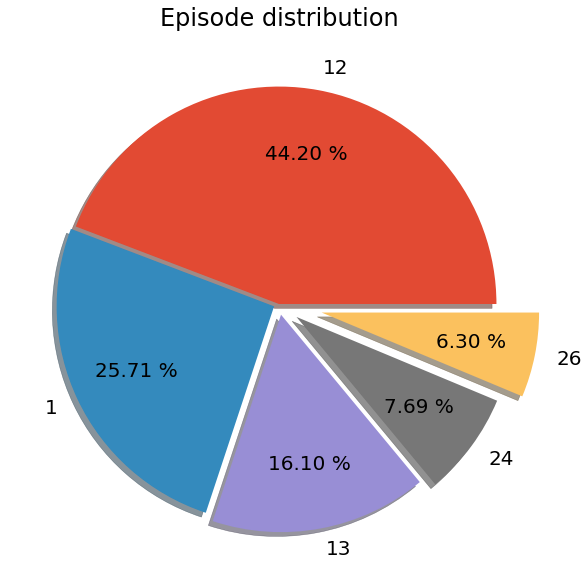

In [ ]:
plt.figure(figsize=(10, 10))
plt.style.use('ggplot')

episodesLabels = df.Episodes.value_counts().head().index.to_list()

plt.title('Episode distribution', fontsize=24)

plt.pie(df.Episodes.value_counts().head(), 
        labels = episodesLabels,
        autopct = '%.2f %%', pctdistance = 0.7,
        textprops={'fontsize': 20},
        explode=[0,0.025,0.05,.1,.2],
        shadow=True)

plt.show()

As we can see Studios oftenly prefer 12-13 episodes for TV series and 1 episode for movies. We choose pie chart here because it is a type of graph that reflects the distribution data nicely.

In [ ]:
popularGenresList = meltedGenres['Genre'].value_counts().head()
popularGenresList.index

Index(['Comedy', 'Action', 'Romance', 'Fantasy', 'Drama'], dtype='object')

In [ ]:

popularTypesforGenres = np.array([meltedGenres.loc[meltedGenres['Genre'] == 'Comedy']['Type'].value_counts()[:2],
                                  meltedGenres.loc[meltedGenres['Genre'] == 'Action']['Type'].value_counts()[:2],
                                  meltedGenres.loc[meltedGenres['Genre'] == 'Romance']['Type'].value_counts()[:2],
                                  meltedGenres.loc[meltedGenres['Genre'] == 'Fantasy']['Type'].value_counts()[:2],
                                  meltedGenres.loc[meltedGenres['Genre'] == 'Drama']['Type'].value_counts()[:2]])

typeLabels = ['TV', 'Movie', 'TV', 'Movie', 'TV', 'Movie', 'TV', 'Movie', 'TV', 'Movie']

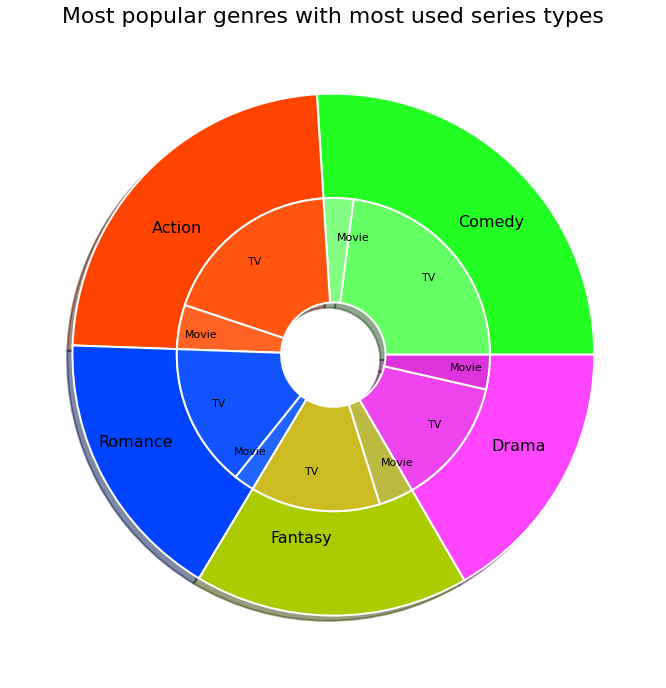

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))
size = 0.4

plt.style.use('ggplot')

genreLabels = meltedGenres['Genre'].value_counts().head().index.to_list()

outer_colors = ['#23FF23',
                '#FF4400',
                '#0044FF', 
                '#AACC00',
                '#FF44FF']
inner_colors = ['#63FF63', '#83FF83', 
                '#FF5511', '#FF6424',
                '#1154FF', '#2264FF',
                '#CCBB21', '#BBBB42',
                '#EE44EE', '#DD33DD']

ax.pie(popularTypesforGenres.sum(axis=1), radius=1,
       wedgeprops=dict(width=size, edgecolor='w', linewidth=2),
       labels=genreLabels, labeldistance=0.7,
       textprops=dict(fontsize=16),
       colors=outer_colors,
       shadow=True)

ax.pie(popularTypesforGenres.flatten(), radius=1-size,
       wedgeprops=dict(width=size, edgecolor='w', linewidth=2),
       labels=typeLabels, labeldistance=0.75,
       textprops=dict(fontsize=11),
       colors=inner_colors,
       shadow=True)

ax.set_title('Most popular genres with most used series types',fontsize=22)
ax.set(aspect="equal")
plt.show()

Most popular 5 genres and their series type proportion is given. We choose nested pie chart here because it is a type of graph that reflects the nested distributions nicely.

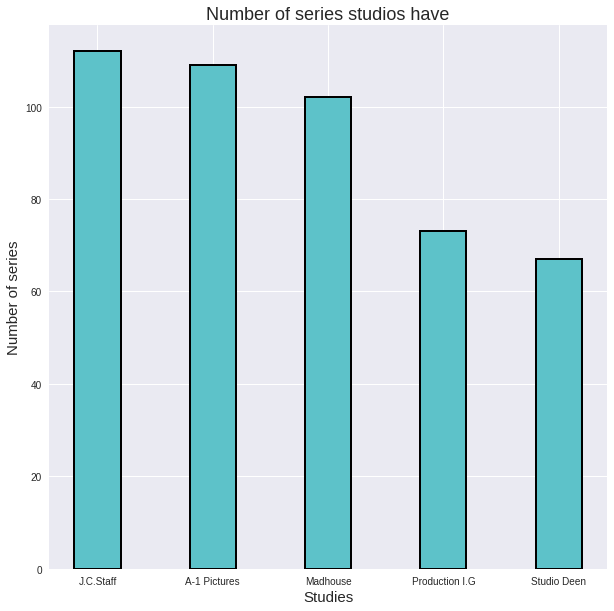

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

studyIndex = meltedStudy['Study'].value_counts()[:5].index.to_list()
studyValues = meltedStudy['Study'].value_counts()[:5].to_list()

ax.bar(studyIndex, studyValues, width = 0.4, color='#5dc2c9', 
        edgecolor='#000000', linewidth=2)

ax.set_xlabel("Studies", fontsize=15)
ax.set_ylabel("Number of series", fontsize=15)
ax.set_title("Number of series studios have", fontsize=18)

plt.show()

3 Studios have over 100+ series. We have used bar chart here because it looks nice when we make comparisons.

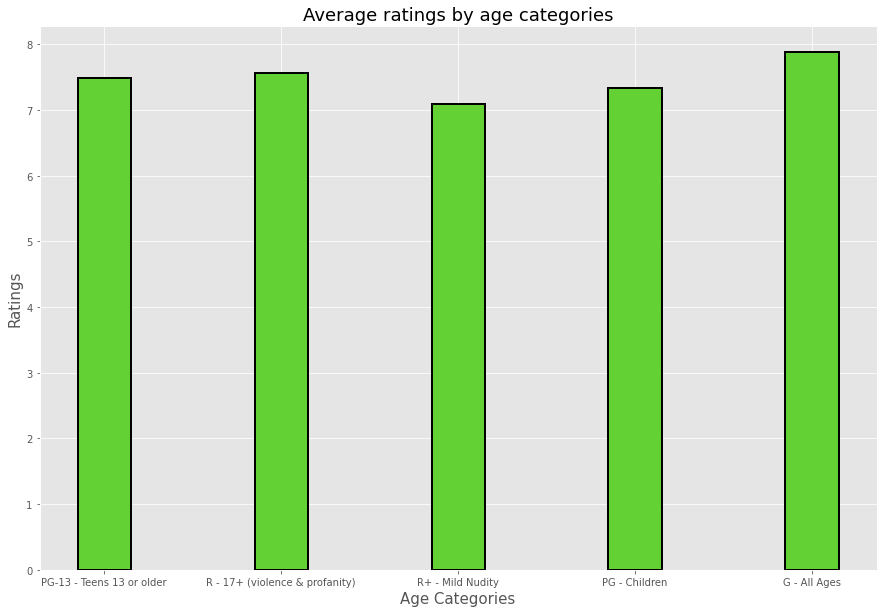

In [ ]:
ageCategories = df['Age'].value_counts().head().index.to_list()
ageRatings = []

for age in ageCategories:
  ageRatings.append(df.loc[df['Age'] == age]['Rating'].mean())

fig, ax = plt.subplots(figsize=(15,10))

ax.bar(ageCategories, ageRatings, width = 0.3, color='#63d134', 
        edgecolor='#000000', linewidth=2)

ax.set_xlabel("Age Categories", fontsize=15)
ax.set_ylabel("Ratings", fontsize=15)
ax.set_title("Average ratings by age categories", fontsize=18)

plt.show()

It is seen that the series appealing to the whole audience have a higher rating rate. We have used bar chart here because it looks nice when we make comparisons.

In [ ]:
popularLicenses = meltedLicense['License'].value_counts().head().index.to_list()
followerCountLicense = []

for lic in popularLicenses:
  followerCountLicense.append(df.loc[df['License'] == lic]['Followers'].sum() / 10000000)

followerCountLicense

[18.0048575, 7.8806473, 10.5423784, 6.8058059, 3.2447358]

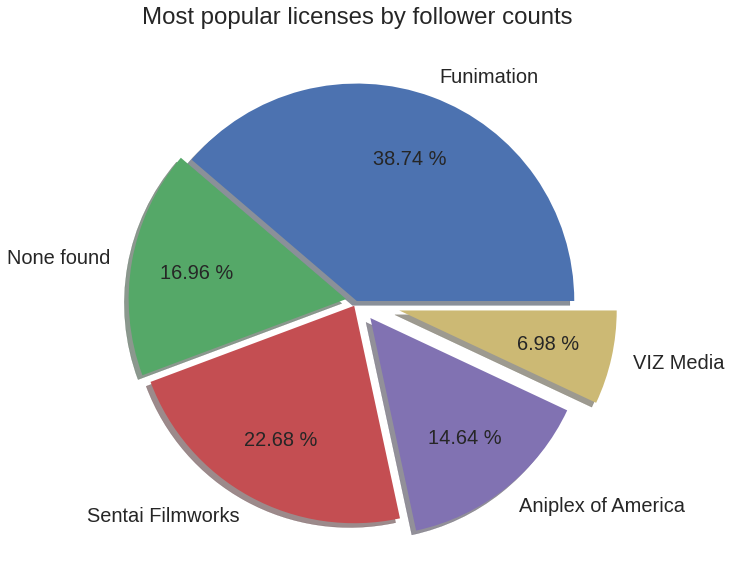

In [ ]:
plt.figure(figsize=(10, 10))
plt.style.use('seaborn')

plt.title('Most popular licenses by follower counts', fontsize=24)

plt.pie(followerCountLicense, 
        labels = popularLicenses,
        autopct = '%.2f %%', pctdistance = 0.7,
        textprops={'fontsize': 20},
        explode=[0,0.05,0.025,.1,.2],
        shadow=True)

plt.show()

Funimation has the most follower count by 18 million. We choose pie chart here because it is a type of graph that reflects the distributions nicely.

### Outliers

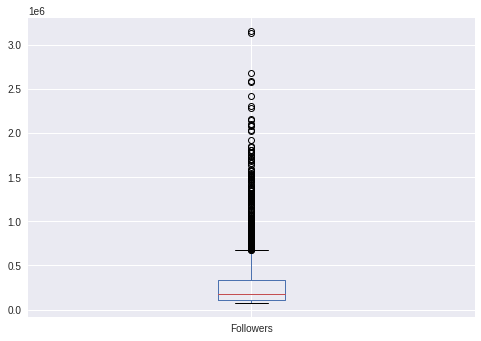

In [ ]:
df.boxplot(column=['Followers']);

In [ ]:
df.describe().Followers

count    2.000000e+03
mean     3.073250e+05
std      3.512699e+05
min      7.244300e+04
25%      1.097425e+05
50%      1.764125e+05
75%      3.375495e+05
max      3.150451e+06
Name: Followers, dtype: float64

In [ ]:
quarter1 = df.describe().Followers['25%']
quarter2 = df.describe().Followers['50%']
quarter3 = df.describe().Followers['75%']
meanRating = df.describe().Followers['mean']
IQR = quarter3 - quarter1
lowerBound = quarter1 - (1.5 * IQR)
upperBound = quarter3 + (1.5 * IQR)
medianFollowers = df.Followers.median()
rangeFollowers = df.describe().Followers['max'] - df.describe().Followers['min']

In [ ]:
print(f"Mean of the Followers column is {meanRating:f}" + 
      f"\nLower bound of the box plot is {lowerBound}" +
      f"\nUpper bound of the box plot is {upperBound}" +  
      f"\nMedian of the Followers column is {medianRating}" + 
      f"\nRange of the Followers column is {rangeRating}")

Mean of the Followers column is 307324.969500
Lower bound of the box plot is -231968.0
Upper bound of the box plot is 679260.0
Median of the Followers column is 176412.5
Range of the Followers column is 3078008.0


In [ ]:
upperOutliersFollowers = df.loc[(df['Followers'] > upperBound), ['Name of the anime','Followers']]
lowerOutliersFollowers = df.loc[(df['Followers'] < lowerBound), ['Name of the anime','Followers']]
followersOutliers = pd.concat([lowerOutliersFollowers,upperOutliersFollowers])
followersOutliers.value_counts().size

202

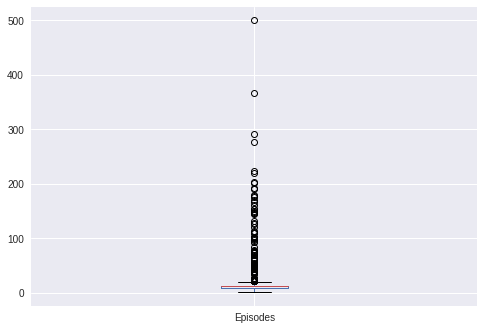

In [ ]:
df.boxplot(column=['Episodes']);

In [ ]:
df.describe().Episodes

count    2000.000000
mean       16.133500
std        26.292705
min         1.000000
25%         8.000000
50%        12.000000
75%        13.000000
max       500.000000
Name: Episodes, dtype: float64

In [ ]:
quarter1 = df.describe().Episodes['25%']
quarter2 = df.describe().Episodes['50%']
quarter3 = df.describe().Episodes['75%']
meanRating = df.describe().Episodes['mean']
IQR = quarter3 - quarter1
lowerBound = quarter1 - (1.5 * IQR)
upperBound = quarter3 + (1.5 * IQR)
medianEpisodes = df.Episodes.median()
rangeEpisodes = df.describe().Episodes['max'] - df.describe().Episodes['min']

In [ ]:
print(f"Mean of the Episodes column is {meanRating:f}" + 
      f"\nLower bound of the box plot is {lowerBound}" +
      f"\nUpper bound of the box plot is {upperBound}" +  
      f"\nMedian of the Episodes column is {medianRating}" + 
      f"\nRange of the Episodes column is {rangeRating}")

Mean of the Episodes column is 16.133500
Lower bound of the box plot is 0.5
Upper bound of the box plot is 20.5
Median of the Episodes column is 176412.5
Range of the Episodes column is 3078008.0


In [ ]:
upperOutliersEpisodes = df.loc[(df['Episodes'] > upperBound), ['Name of the anime','Episodes']]
lowerOutliersEpisodes = df.loc[(df['Episodes'] < lowerBound), ['Name of the anime','Episodes']]
episodesOutliers = pd.concat([lowerOutliersEpisodes,upperOutliersEpisodes])
episodesOutliers.value_counts().size

436

As an example we already plotted Rating column's boxplot above. We will not plot Ranking column because it just contains number from 1 to 2000.

## PART V - Data Analysis

In Part V, the results obtained from the analyzes so far will be shared and statistical analysis will be made about the visualizations in part 4. Columns will be explained in detail.

### Column Details

- **'Name of the anime'** column has unique names with string object type. There are no missing values. Name of the anime in this column has the data in the next columns.

- **'Rating'** column has numerical variables in it. These values indicates the anime's rating. There was missing values but they are handled.

- **'Ranking'** column has numerical variables in it. These values shows the ranking of the anime by followers. It was discovered that there is a parabolic relationship between followers and ranking. You can see it below.

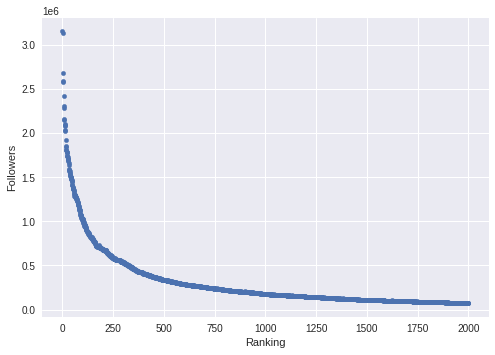

In [ ]:
df.plot("Ranking","Followers",kind = 'scatter');

- **'Followers'** column was containing string objects. We transformed them to integer objects. It indicates that anime has that many followers on the website.

- **'Type'** column contains categorical variables. There was a several missing values but they are handled on Part III. This column indicates the type of the series.

- **'Episodes'** column was containing string objects. We transformed them to integer objects. There were some missing data but they are replaced. This column indicates the episodes of the anime. 

- **'License'** column was containing string objects. It still has string objects but for further usage, we have created a new dataframe for this column because sometimes it contains multiple variables in one column. In our new dataframe we seperated its data.

- **'Study'** column was containing string objects. This column has the same issue with the **License** column. We applied same logic to this column too. 

- **'Genre'** column was containing string objects. This column has the same issue with the **License** column. We applied same logic to this column too. 
Additionally, this column was containing missing values but they are handled at Part III.

- **'Demography'** column contains categorical variables. They were many missing values but they are replaced with meaningful value.

- **'Age'** column contains categorical variables. They were some missing values but they are replaced with meaningful value.

### Analyze statistics

- We have analyzed **episode distribution**. According to our preprocessed data, it is seen that production companies mostly prefer to present animes around 12 episodes and they make movies around 1 episode. However, it is also possible to see animes with episodes as high as 500. **22%** of the episode values are seen as outlier values.

- We have analyzed **most popular genres with most used series types**. By looking this data we can say that, for the most popular 5 genres, production companies production companies have performed it appropriate to present animes in TV or movie format. **90%** of the TV type is used.

- We have analyzed **number of series studios have**. According to this analysis, **25%** of the series held by only 5 studios.

- We have analyzed **average ratings by age categories**. As a result, it is seen that,G - All Ages category takes place in the top **25%** of the ratings.

- We have analyzed **most popular licenses by follower counts**. It is seen that Funimation license has the most followers. In the second place are the productions that are not licensed. In the distribution of the follower column, it was found that the first **10%** were seen as outliers.

## PART VI - Machine Learning (ML) Implementation - Clustering

In Machine Learning Implementation, there are several ML strategies on clustering mechanism. Since our dataset has not a small number of neglectable outliers, Density- Based Clustering format would highly efficient for our Data Analysis approach. The light of this investigation, we choose the DBSCAN and OPTICS Machine Learning Algorithms for optimum Clustering observation.

### DBScan Clustering

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [ ]:
db = DBSCAN(eps=0.2, min_samples=20)
db2 = DBSCAN(eps=0.4, min_samples=6)

We created 2 dbscan objects with different parameters at here.

In [ ]:
clusterData = []

dfRating = df.dropna(subset=['Rating'])

clusterData = dfRating[['Followers','Rating']].to_numpy()
clusterData = StandardScaler().fit_transform(clusterData)
clusterData

array([[ 8.05872636,  1.72471612],
       [ 8.02046334,  1.56220678],
       [ 6.70992096,  2.50771566],
       ...,
       [-0.14784861,  0.72011293],
       [-0.30637412,  0.4246414 ],
       [-0.51844006, -0.07766019]])

Data scaling ve Transformation techniques are done.

In [ ]:
dbscanClustering = db.fit(clusterData)
dbscanClustering2 = db2.fit(clusterData)
clusterLabel = dbscanClustering.labels_
clusterLabel2 = dbscanClustering2.labels_
len(set(clusterLabel))

2

We created a model for 2 separate clusterings and we called a label. 
In the first label, 2 clusters appear.


In [ ]:
len(set(clusterLabel2))

3

In the second label, there is 3 clusters appear.

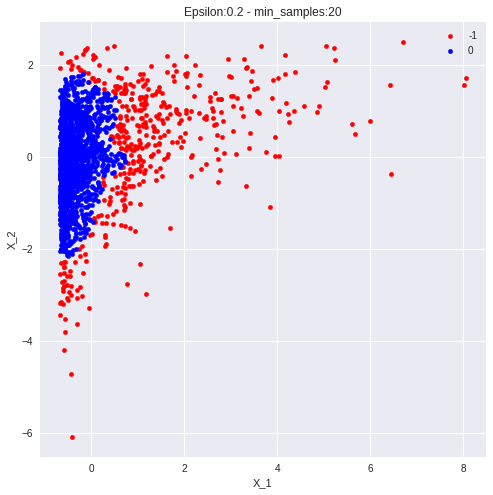

In [ ]:
colors = {-1: 'red', 0:'blue', 1:'orange', 2:'green', 3:'black', 4:'purple'}
dFrame = pd.DataFrame(dict(x=clusterData[:,0],
                           y=clusterData[:,1], 
                           label=clusterLabel))
fig, ax = plt.subplots(figsize=(8,8))
grouped = dFrame.groupby('label')
for key, group in grouped:
  group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

plt.xlabel('X_1')
plt.ylabel('X_2')
plt.title('Epsilon:0.2 - min_samples:20')
plt.show()

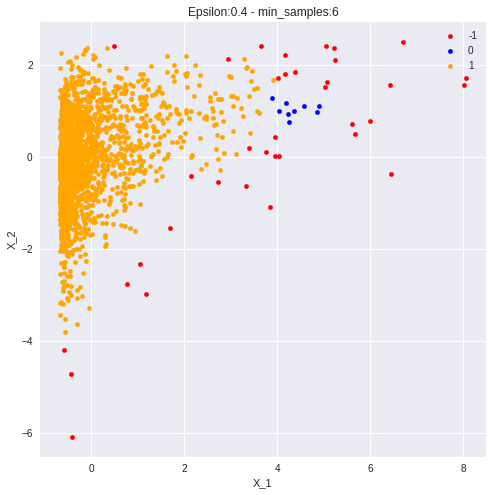

In [ ]:
dFrame = pd.DataFrame(dict(x=clusterData[:,0],
                           y=clusterData[:,1], 
                           label=clusterLabel2))
fig, ax = plt.subplots(figsize=(8,8))
grouped = dFrame.groupby('label')
for key, group in grouped:
  group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

plt.xlabel('X_1')
plt.ylabel('X_2')
plt.title('Epsilon:0.4 - min_samples:6')
plt.show()

The result of the two tables, we can make interpretations. First of all, we visualize 2 different models. Then, we can see how the different parameters affect the results. As the epsilon value increases, even if the similarity is less, there is data included in the cluster. Also, when the value of the minimum samples decreases, the number of clusters increases.

### Optics Clustering

In [ ]:
from sklearn.cluster import OPTICS, cluster_optics_dbscan
from matplotlib import gridspec
from sklearn.preprocessing import normalize

In [ ]:
dfOptics= df.dropna(subset=['Rating'])
drop_features = ['Name of the anime', 'Ranking','Type','Episodes','License','Study','Genre','Demographics','Age']
dfOptics = dfOptics.drop(drop_features, axis = 1)

clusterScaled = StandardScaler().fit_transform(dfOptics)

clusterNormalized = normalize(clusterScaled)
clusterNormalized = pd.DataFrame(clusterNormalized)

clusterNormalized.columns = dfOptics.columns


We create a data frame with the desired rows.
Then we scale and transform the data and then, we normalized the data.

In [ ]:
optics_model = OPTICS(min_samples = 10, xi = 0.1, min_cluster_size = 0.05)
optics_model2 = OPTICS(min_samples = 20, xi = 0.05, min_cluster_size = 0.1)

optics_model.fit(clusterNormalized)
optics_model2.fit(clusterNormalized)

OPTICS(min_cluster_size=0.1, min_samples=20)



We create OPTICS clustering models with 2 different parameters

In [ ]:

space = np.arange(len(clusterNormalized))
reachability = optics_model.reachability_[optics_model.ordering_]
labels = optics_model.labels_[optics_model.ordering_]

reachability2 = optics_model2.reachability_[optics_model2.ordering_]
labels2 = optics_model2.labels_[optics_model2.ordering_]


We store label and reachability information from  2 different created models.

https://scikit-learn.org/stable/auto_examples/cluster/plot_optics.html#sphx-glr-auto-examples-cluster-plot-optics-py

We benefited from this source.

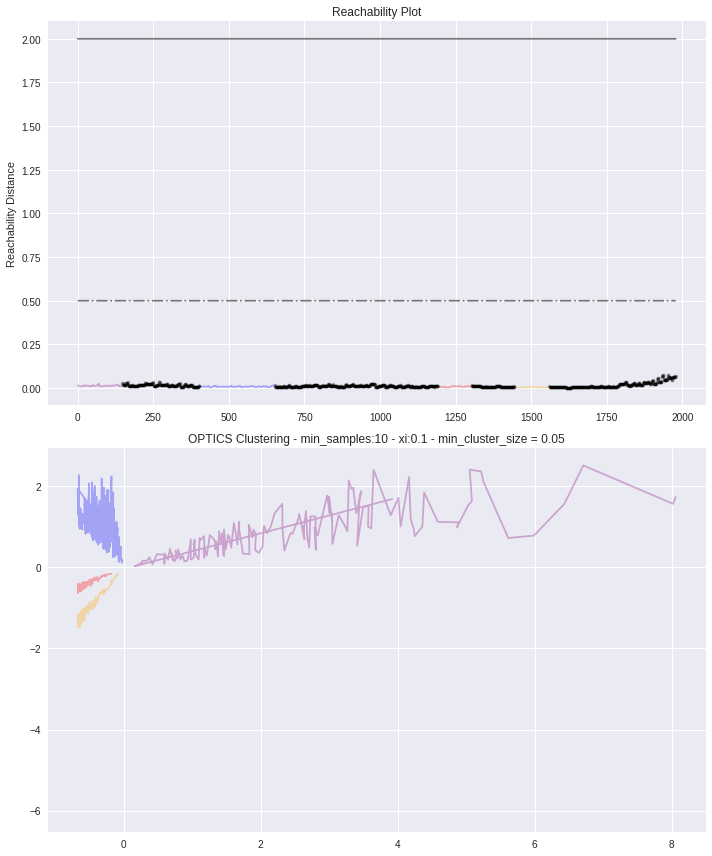

In [ ]:
plt.figure(figsize =(10, 12))
G = gridspec.GridSpec(2, 1)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
  
colors = ['purple', 'blue', 'red', 'orange', 'green', 'black']
for Class, colour in zip(range(0, 5), colors):
    Xk = space[labels == Class]
    Rk = reachability[labels == Class]
    ax1.plot(Xk, Rk, colour, alpha = 0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], 'k.', alpha = 0.3)
ax1.plot(space, np.full_like(space, 2., dtype = float), 'k-', alpha = 0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype = float), 'k-.', alpha = 0.5)
ax1.set_ylabel('Reachability Distance')
ax1.set_title('Reachability Plot')
  
for Class, colour in zip(range(0, 5), colors):
    Xk = clusterData[optics_model.labels_ == Class]
    ax2.plot(Xk[:, 0], Xk[:, 1], colour, alpha = 0.3)
      
ax2.plot(clusterData[optics_model.labels_ == -1, 0],
        clusterData[optics_model.labels_ == -1, 1],
       'k+', alpha = 0.1)
ax2.set_title('OPTICS Clustering - min_samples:10 - xi:0.1 - min_cluster_size = 0.05')
  
plt.tight_layout()
plt.show()

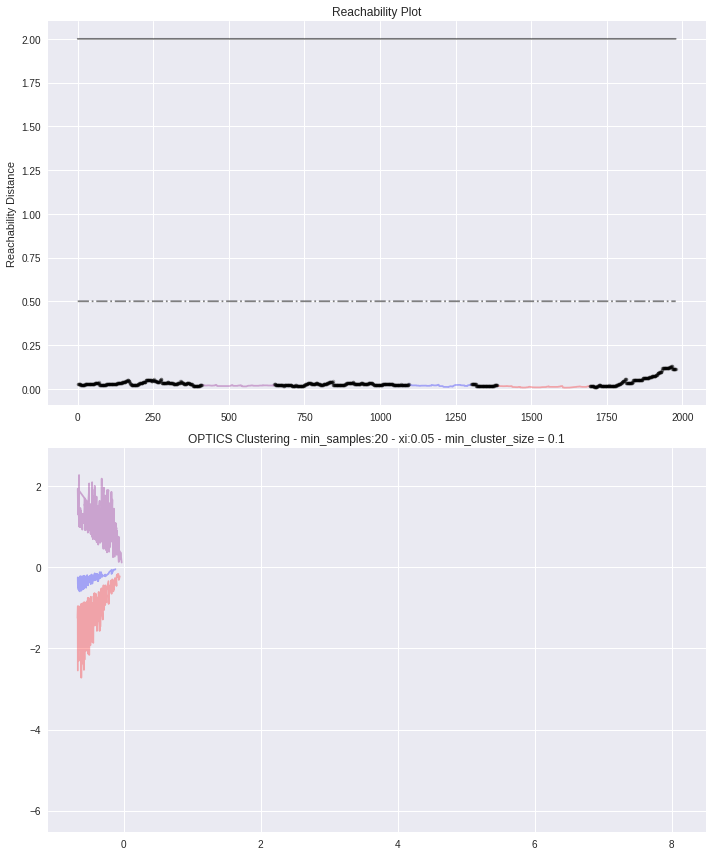

In [ ]:
plt.figure(figsize =(10, 12))
G = gridspec.GridSpec(2, 1)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
  
colors = ['purple', 'blue', 'red', 'orange', 'green']
for Class, colour in zip(range(0, 5), colors):
    Xk = space[labels2 == Class]
    Rk = reachability2[labels2 == Class]
    ax1.plot(Xk, Rk, colour, alpha = 0.3)
ax1.plot(space[labels2 == -1], reachability2[labels2 == -1], 'k.', alpha = 0.3)
ax1.plot(space, np.full_like(space, 2., dtype = float), 'k-', alpha = 0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype = float), 'k-.', alpha = 0.5)
ax1.set_ylabel('Reachability Distance')
ax1.set_title('Reachability Plot')
  
for Class, colour in zip(range(0, 5), colors):
    Xk = clusterData[optics_model2.labels_ == Class]
    ax2.plot(Xk[:, 0], Xk[:, 1], colour, alpha = 0.3)
      
ax2.plot(clusterData[optics_model2.labels_ == -1, 0],
        clusterData[optics_model2.labels_ == -1, 1],
       'k+', alpha = 0.1)
ax2.set_title('OPTICS Clustering - min_samples:20 - xi:0.05 - min_cluster_size = 0.1')
  
plt.tight_layout()
plt.show()

To begin with, we visualize 2 different models here. Then, we can see how the different parameters affect the results. 
When the value of the minimum samples decreases, the number of clusters increases. 
As the min_cluster size value decreases, the number of clusters tends to decrease.
As the xi value increases, it tends to include the outliers in the cluster.
Reducing the xi value is ignoring outliers more.
As a result of two ML techniques, we determined the OPTICS methodology is better on our Data Analysis.


## PART VII - Results

In [ ]:
When we analyzed our dataset, the main findings are our dataset has many outliers and noise. For visualization, you can see the scatterplot which is located at the bottom side. 

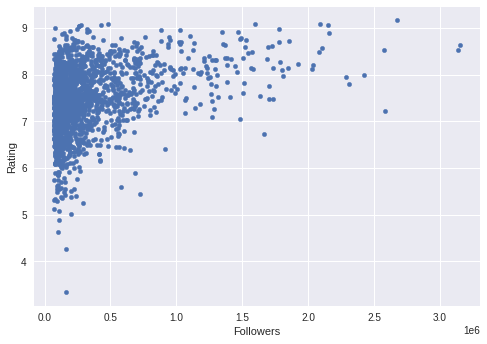

In [ ]:
df.plot("Followers","Rating",kind = 'scatter');

Some columns had missing values but we handled them at pre-processing part. Some missing values are ignored and some of them are replaced with suitable values in an appropriate way. 
Then, we created some visualization that indicates two relationship of the columns to make clear in Part 4.  
At Part 5, we analyzed deeply the visual data. We made inferences for each of the visualizations.
At Part 6, the light of the analysis has shown us that our data has lots of noise. Thats why, we determined the density based clustering. Then, we performed the DBSCAN and OPTICS as a 2 different Clustering Algorithms. When we analyzed the results of the clustering algorihms, we interpretted that the DBSCAN Clustering Algorithms would be perform better demonstration for our dataset.

